# 배경
(1) 최대한 다양한 요소들을 분석해서 그 교집합이 큰 기업 선정 <br><br>
(2) 기존 유니콘 기업을 선정하는 기준(기업가치 1조 이상, 설립일 10년 이하의 비상장스타트업)으로는 X <br><br>
(3) 성장률(추이)을 주의 깊게 봐야함 (직원 대비 매출액 등)<br><br>
(4) 변수들 조합하여 새로운 feature 생성 필요<br><br>
(5) 자체적인 기준을 정하고 그 기준에 부합하는 기업들을 걸러내야 함

# 유니콘(or 예비 유니콘)기업에 대한 자체적인 정의

****

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [5]:
df = pd.read_csv('./company_nps_data.csv', encoding='cp949')
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [31]:
display(df.isnull().any())
display(df.info())

회사ID        False
연매출액        False
년도          False
월           False
월별_연금보험료    False
월별_직원수      False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


None

* 결측치 없음

In [34]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


* 월별 연금보험료와 월별 직원수가 0인 회사 존재
* 연매출액이 **마이너스**인 회사도 존재

In [11]:
df['회사ID'].value_counts().loc[df['회사ID'].value_counts() > 1]

250472    50
404192    50
128174    50
395238    50
135668    50
          ..
440265     2
414997     2
367893     2
409839     2
367252     2
Name: 회사ID, Length: 4961, dtype: int64

In [13]:
print(df['년도'].min())
print(df['년도'].max())

2015
2019


In [65]:
df['회사ID'].nunique()

5000

* 중복 제외 회사 개수: 5000개

### 유니콘 기업 : 비상장 스타트업 중 창업 10년 이내 기업가치 1조원 달성한 기업
* 글로벌 유니콘 기업은 전년도 매출액 대비 평균 약 267배로 기업가치를 평가받고 있다.(국내는 좀 다름)
* 주어진 데이터(2015~2019): 연매출액, 월별 연금보험료, 월별 직원수
* 기업가치는 매출이나 영업이익을 어느 정도 반영하지만, 매출과 비례하지는 않는다.
(https://chloe-ki.tistory.com/entry/%ED%95%9C%EA%B5%AD-%EC%9C%A0%EB%8B%88%EC%BD%98-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85-%EB%A7%A4%EC%B6%9C-%EC%88%9C%EC%9C%84-2020)
* 한국 유니콘 기업 수는 2019년 기준 △비바리퍼블리카 △야놀자 △엘앤피코스메틱 △옐로모바일 △우아한형제들 △위메프 △크래프톤 △쿠팡 △지피클럽 등 총 9개
* 2021 한국 유니콘 기업 리스트 및 현황(https://better-together.tistory.com/191)
* 국내 유니콘 기업들의 연매출은 기업마다 천차만별 (2019년 기준 최소 연매출 유니콘 기업 279억~최대 연매출 기업 7조 1530억)이므로 매출만으로 판단할 수 없지만, 일반적으로 1000억 이상의 연매출을 보인다.
<br><Br>
    
### 분석 방향성 (아직 고민 중...)
(1) 연매출액 추이 및 성장률 <br>
(ex. 연매출액이 꾸준히 증가하면서 연매출액이 1000억 이상인 기업들을 일단 추려내면 좋을 것 같습니다. --> X)<br>
--> 현재 제공받은 데이터에서 연매출액 max값은 113억입니다. 따라서, 기존의 유니콘 기업들의 연매출(일반적으로 1000억 원 이상) 기준을 적용하면 안됨 --> 자체적으로 유니콘 기업에 대한 정의 필요<br>
(2) 월별 연금보험료 추이 및 증감률<br>
(3) 월별 직원수 추이 및 증감률<br><br>

### 5/3 추가
* 신용보증기금은 2019년부터 작년까지 네 차례에 걸쳐 총 22개 혁신아이콘(차세대유니콘기업)을 선정했으며, 전담 조직인 지식재산금융센터를 통해 총 1천910억원의 신용보증한도를 제공하고 해외진출, 법률·노무컨설팅, 잡매칭 등 13건의 맞춤형 비금융서비스를 지원했다.
<br>**이를 통해 혁신아이콘 기업은 전년 동기 대비 73.0%의 매출 성장과 59.7% 고용 증가를 달성했으며, 1천765억원의 민간 후속 투자를 유치했다고 신보는 전했다.**
<br>(참고자료: https://www.yna.co.kr/view/AKR20210217050200002)
* 유니콘 기업들, 예비 유니콘 기업들이라 불리는 기업들의 19년 대비 20년 매출 상승률은 '대부분' 50% 이상을 보였음 
<br>(참고자료: https://brunch.co.kr/@digitalnative/23)
<br><br>
### 참고 링크

* https://www.newspim.com/news/view/20201217000275
* http://www.kocam.org/?p=18892
* https://www.mk.co.kr/news/economy/view/2020/01/78782/

# EDA

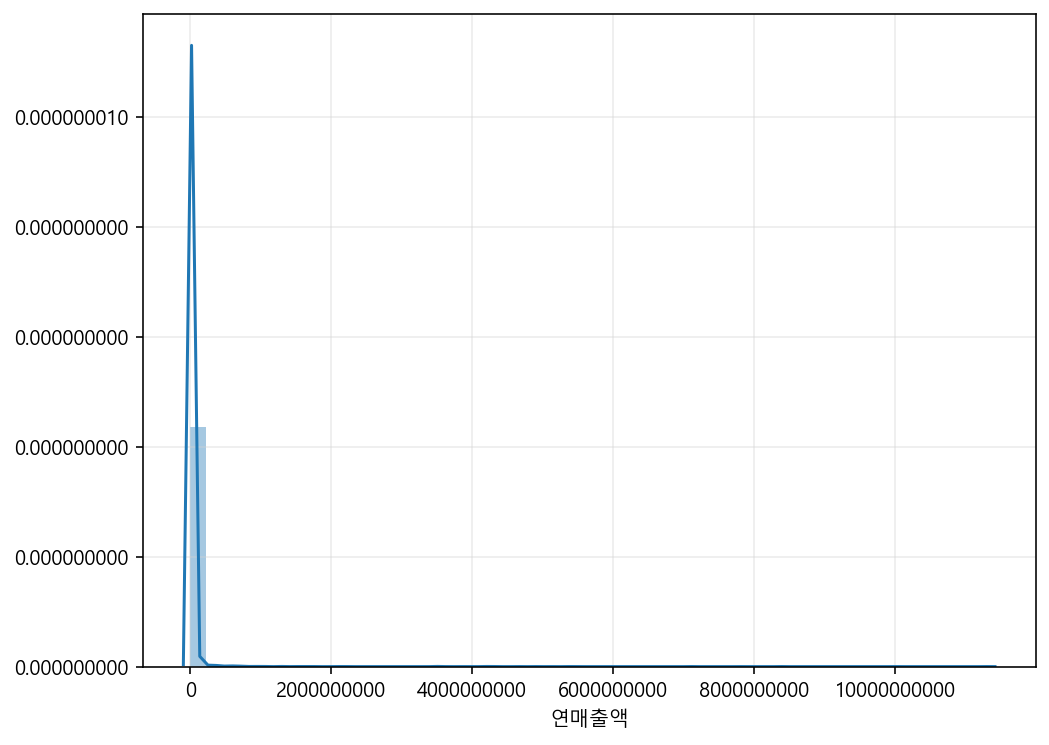

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(df['연매출액'])
plt.grid(color='lightgrey', alpha=0.43)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

## 연매출 분포

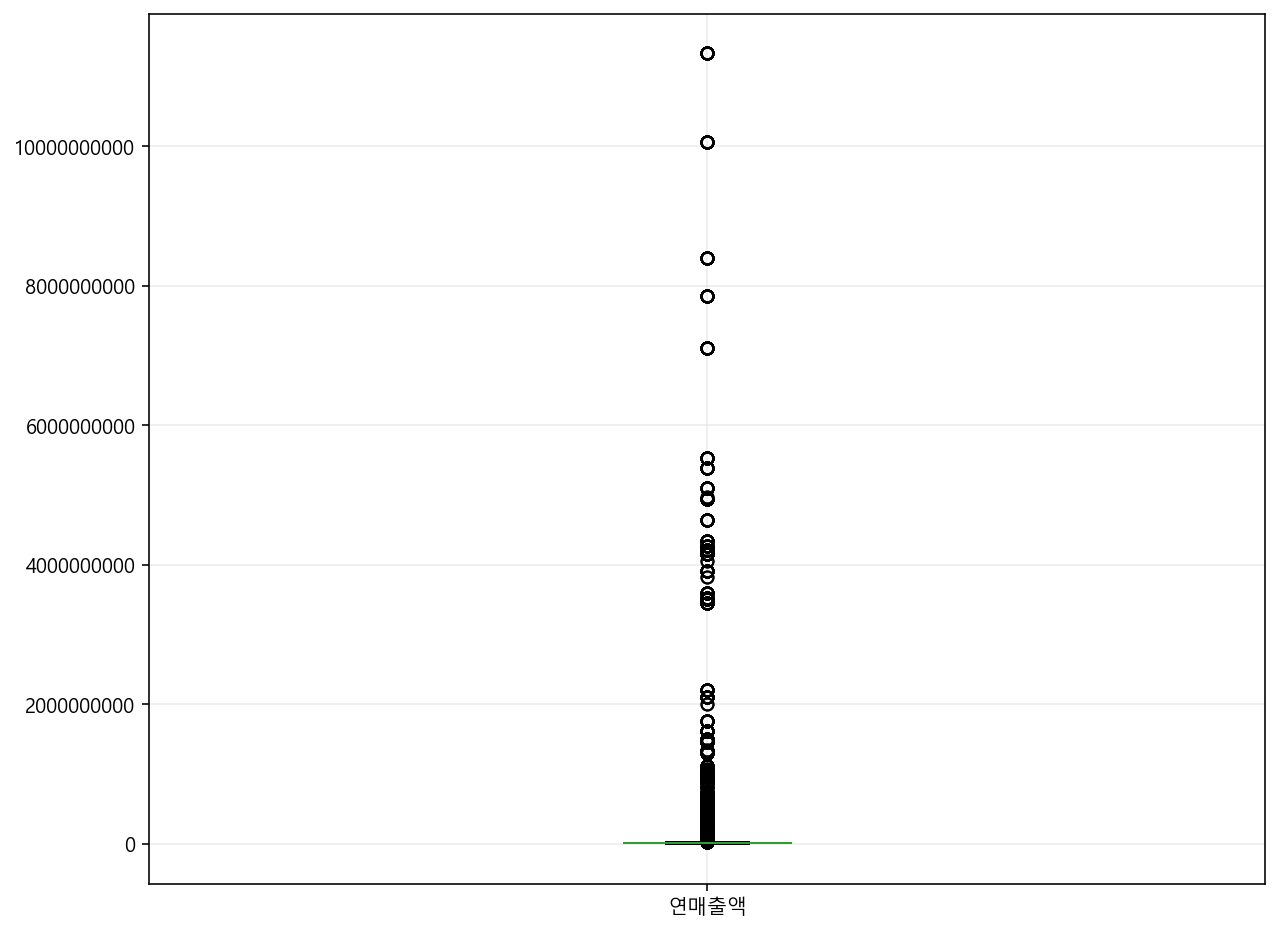

In [42]:
ax = df['연매출액'].plot(kind='box',
               figsize=(10, 8))
plt.grid(color='lightgrey', alpha=0.43)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [52]:
print(df['연매출액'].min())
print(df['연매출액'].max())

-7882176
11328779396


* 연매출액 최솟값: -788만
* 연매출액 최댓값: 113억

In [28]:
len(df['연매출액'].loc[df['연매출액'] >= 10000000000])

24

* 연매출액 100억 이상 기업 : 24곳

In [44]:
df['연매출액'].loc[df['연매출액'] >= 10000000000].sort_values(ascending=False)

98243    11328779396
23302    11328779396
23648    11328779396
28110    11328779396
33039    11328779396
80947    11328779396
52606    11328779396
80770    11328779396
53569    11328779396
6449     11328779396
79358    11328779396
74251    11328779396
72938    10058868796
89842    10058868796
88487    10058868796
6086     10058868796
71565    10058868796
70918    10058868796
64436    10058868796
53151    10058868796
35822    10058868796
25614    10058868796
13109    10058868796
60354    10058868796
Name: 연매출액, dtype: int64

## 연매출 관련

In [49]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


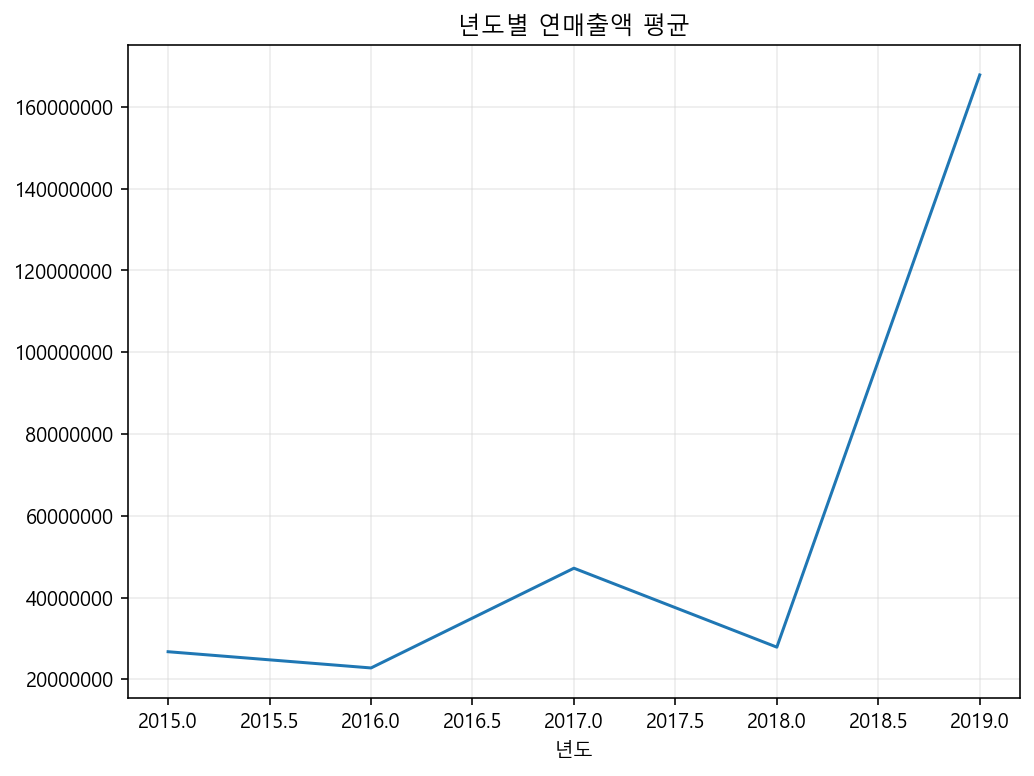

In [148]:
df_sales = df[['회사ID', '연매출액', '년도', '월']]
ax = df_sales.groupby(['년도'])['연매출액'].mean().plot(kind='line', figsize=(8, 6))
plt.title('년도별 연매출액 평균')
plt.grid(color='lightgrey', alpha=0.43)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [149]:
df_sales.head()

,회사ID,연매출액,년도,월
0,233757,41688077,2018,7
1,123464,1760695,2018,3
2,342124,3221341,2018,7
3,386420,4815584,2015,11
4,129243,9799736,2018,10


In [150]:
df_sales['Date'] = pd.to_datetime(df_sales['년도'].astype(str) + df_sales['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
df_sales.head()

,회사ID,연매출액,년도,월,Date
0,233757,41688077,2018,7,2018/07
1,123464,1760695,2018,3,2018/03
2,342124,3221341,2018,7,2018/07
3,386420,4815584,2015,11,2015/11
4,129243,9799736,2018,10,2018/10


In [147]:
# from datetime import datetime
# df_sales['Date2'] = df_sales['Date'].apply(lambda x: datetime.strptime(x, '%Y/%m'))
# df_sales.head()

In [158]:
df_sales.set_index('Date').sort_index(ascending=True)

,회사ID,연매출액,년도,월
Date,,,,
2015/11,391439,2465042,2015,11
2015/11,381560,10314403,2015,11
2015/11,305317,12271715,2015,11
2015/11,301480,8353896,2015,11
2015/11,242049,2586419,2015,11
...,...,...,...,...
2019/12,258745,775720,2019,12
2019/12,254479,2269625,2019,12
2019/12,401386,1512330,2019,12


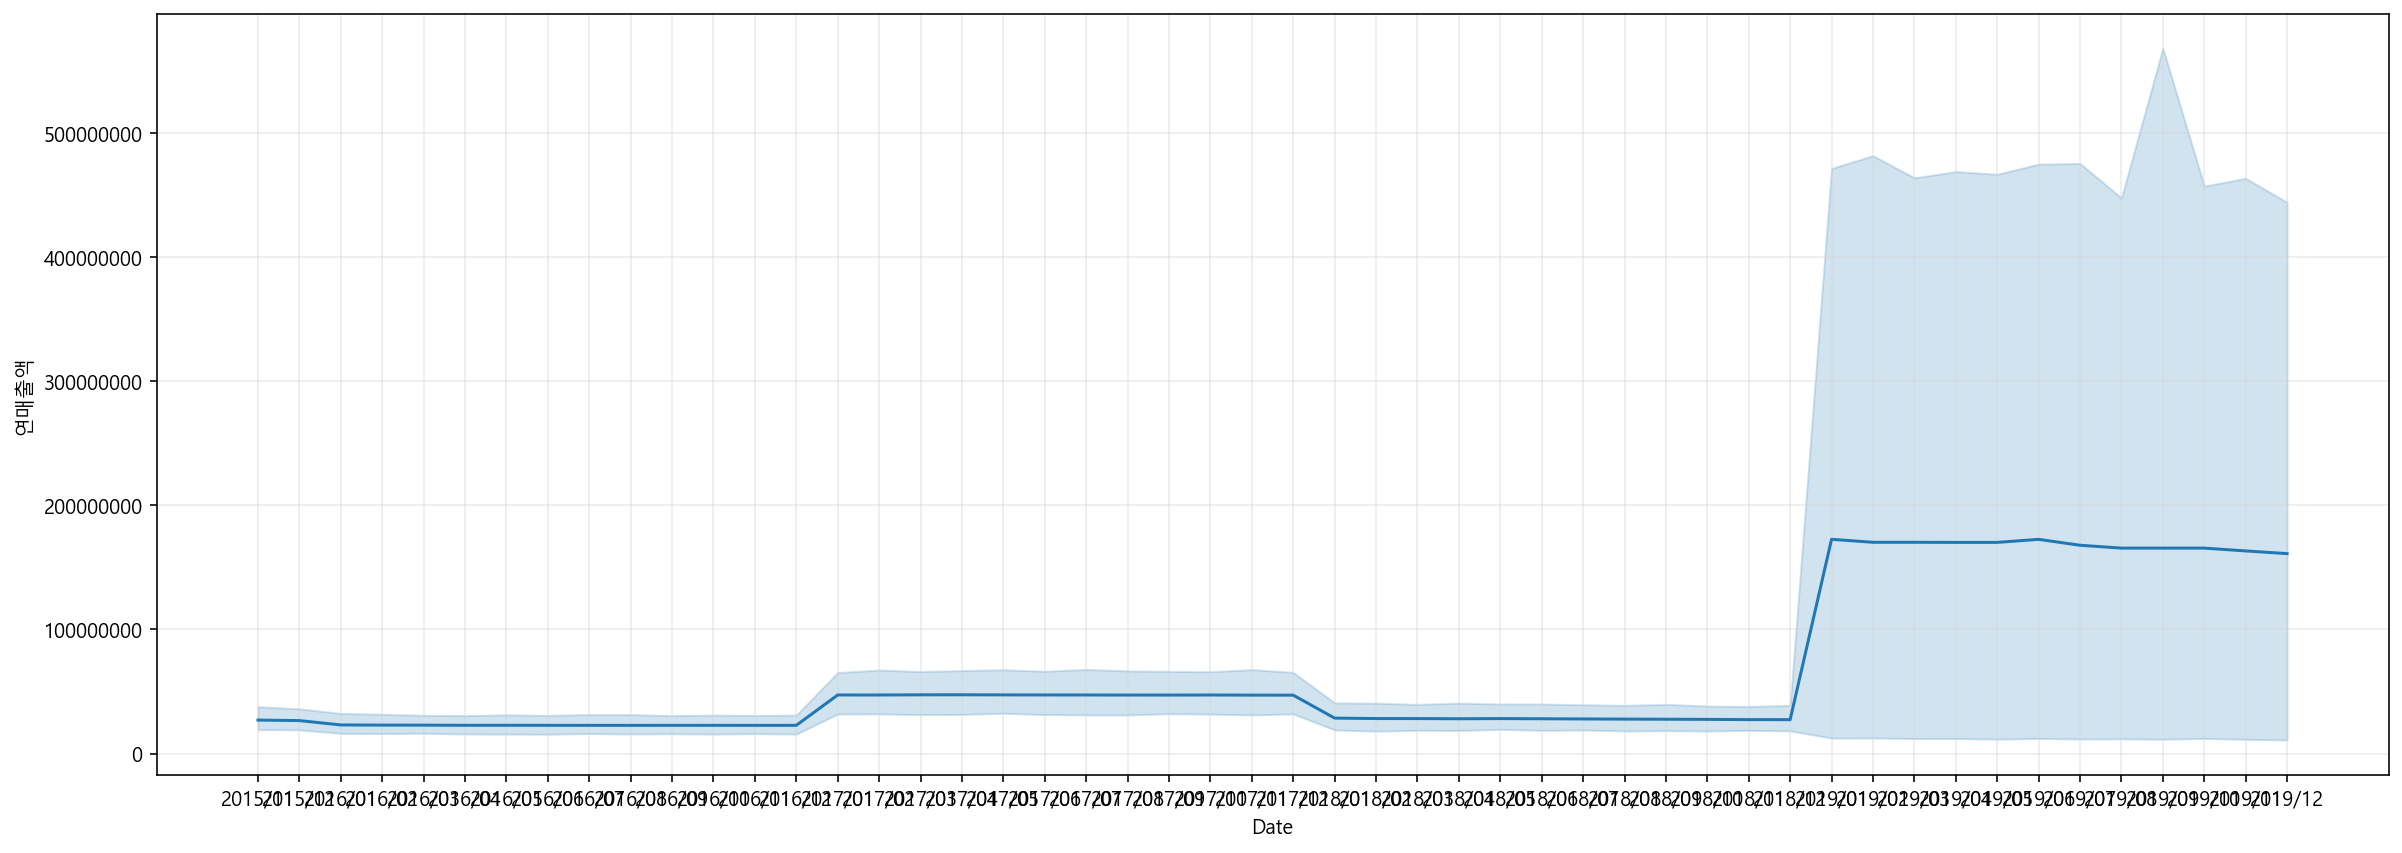

In [164]:
plt.figure(figsize=(20, 7))
ax = sns.lineplot(data=df_sales, x='Date', y='연매출액')
plt.grid(color='lightgrey', alpha=0.45)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [205]:
pd.set_option('display.max_rows', None)
df_sales2 = df_sales.pivot_table(index=['회사ID', '년도'],
                                 values='연매출액').unstack()
print(df_sales2.shape)
df_sales2.head()

(5000, 5)


연매출액                              
년도   2015 2016 2017           2018 2019
회사ID                                   
63    NaN  NaN  NaN 11328779396.00  NaN
95    NaN  NaN  NaN   656947437.00  NaN
102   NaN  NaN  NaN   742658938.00  NaN
295   NaN  NaN  NaN    83776697.00  NaN
414   NaN  NaN  NaN    19732769.00  NaN

## 월별 연금보험료 관련

In [100]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


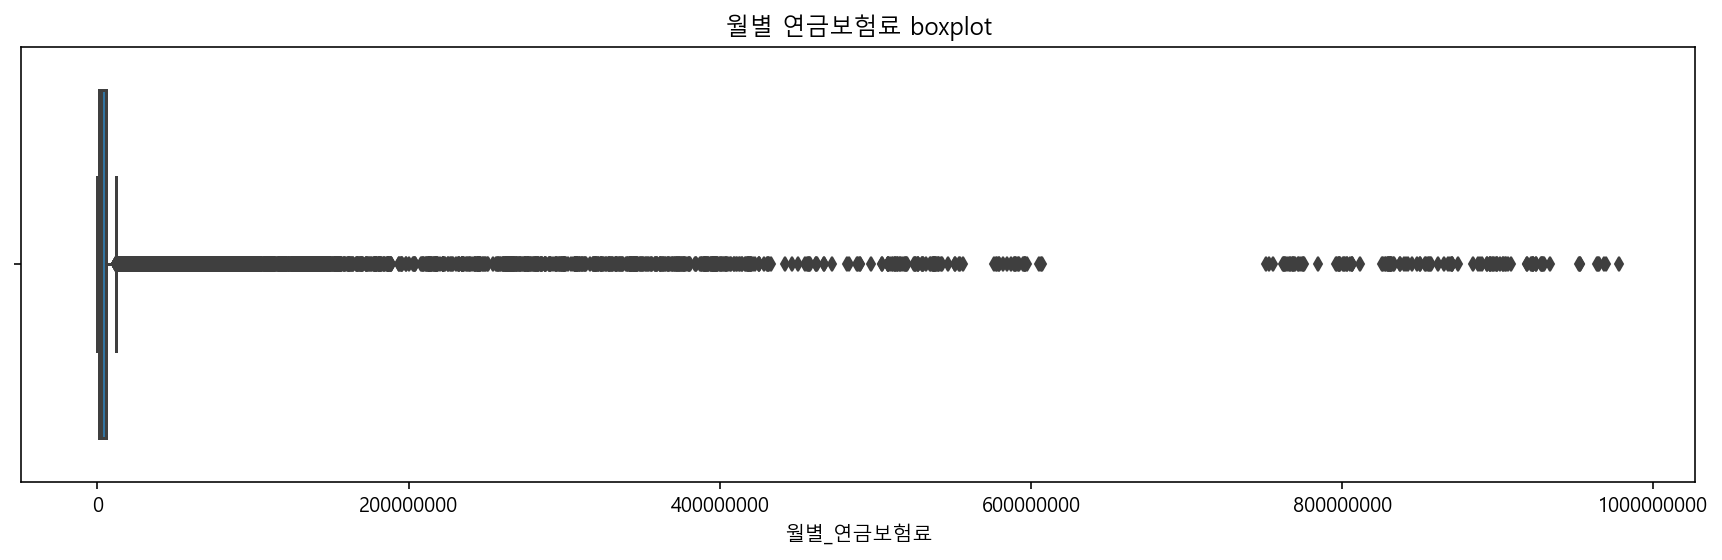

In [120]:
plt.figure(figsize=(15, 4))
ax = sns.boxplot(data=df, x='월별_연금보험료')
ax.set_title('월별 연금보험료 boxplot')
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [112]:
print(df['월별_연금보험료'].min())
print(df['월별_연금보험료'].max())

0
978067260


* 월별 연금보험료 최솟값 : 0원
* 월별 연금보험료 최댓값 : 약 9억 7천만

In [114]:
df['월별_연금보험료'].value_counts().sort_index(ascending=False)

978067260     1
969234340     1
967961440     1
964790780     1
964616500     1
             ..
117000        1
114020        4
104400        1
90000         1
0            13
Name: 월별_연금보험료, Length: 50747, dtype: int64

In [130]:
df.loc[df['월별_연금보험료'] == 0, '회사ID'].unique()

array([478999, 568445, 288014, 550603, 439536, 602137, 291968, 277054,
       472629, 157237, 217292], dtype=int64)

* 월별 연금보험료가 0인 기업(중복은 1회로 count) : 11개

## 월별 직원수 관련

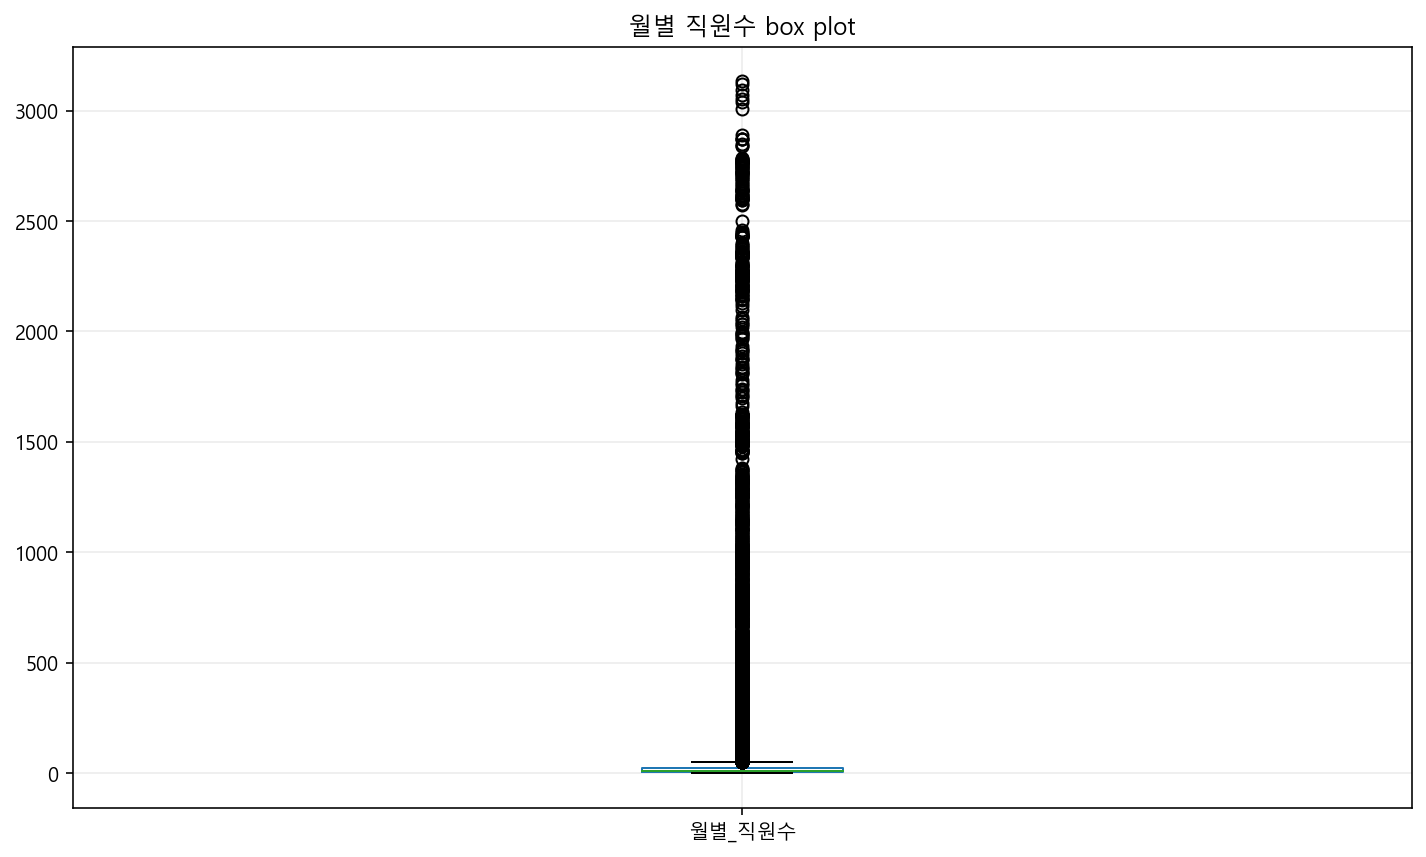

In [119]:
df['월별_직원수'].plot(kind='box', figsize=(12, 7))
plt.title('월별 직원수 box plot')
plt.grid(color='lightgrey', alpha=0.43)

In [122]:
df['월별_직원수'].value_counts().sort_index()

0         13
3       6939
4       8322
5       7302
6       7227
        ... 
3051       1
3070       1
3095       1
3119       1
3133       1
Name: 월별_직원수, Length: 1187, dtype: int64

In [131]:
# df['월별_직원수'].value_counts().loc[df['월별_직원수'].value_counts().values <= 10]

In [136]:
df.loc[df['월별_직원수']<10, '회사ID'].nunique()

3178

* 월별 직원수 10명 이하인 곳(중복은 1회로 count): 3178개

## 산점도

### 월별 연금보험료 & 월별 직원수

In [165]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


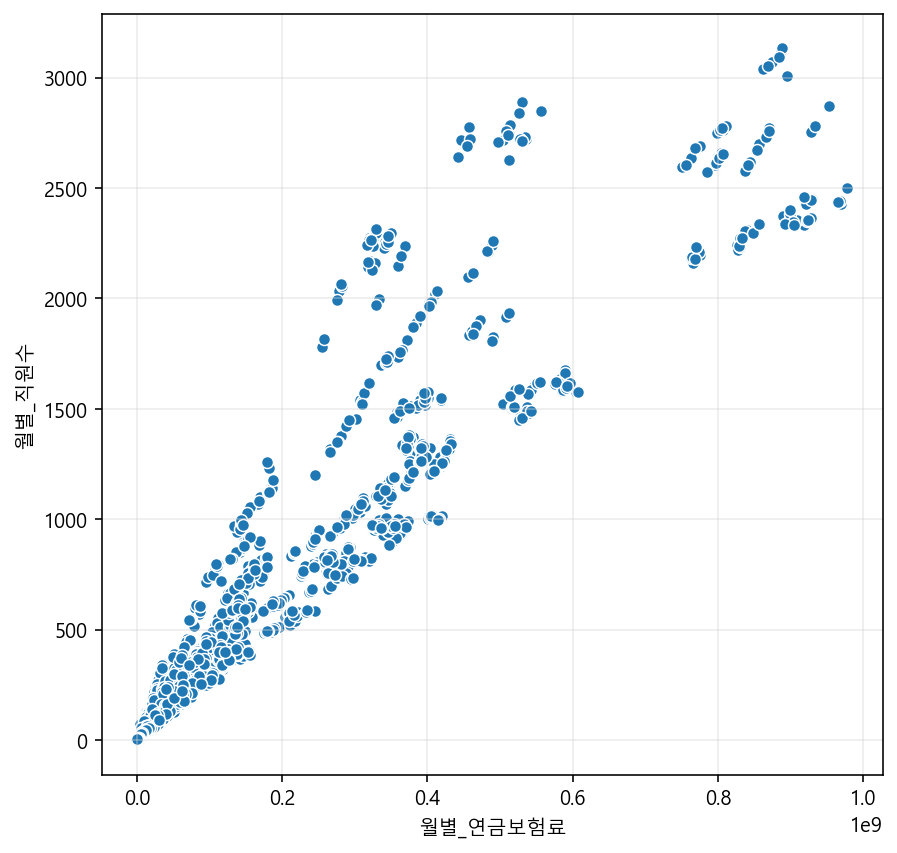

In [167]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='월별_연금보험료', y='월별_직원수')
plt.grid(color='lightgrey', alpha=0.45)

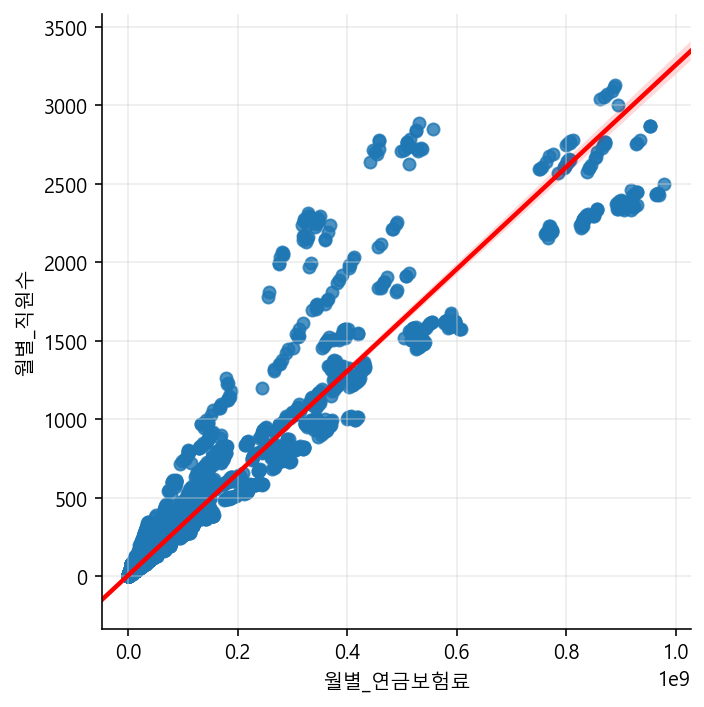

In [177]:
sns.lmplot(x="월별_연금보험료", y="월별_직원수", data=df, line_kws={'color':"red"})
plt.grid(color='lightgray', alpha=0.45)

In [171]:
df[['월별_연금보험료', '월별_직원수']].corr()

,월별_연금보험료,월별_직원수
월별_연금보험료,1.00,0.96
월별_직원수,0.96,1.00


<AxesSubplot:>

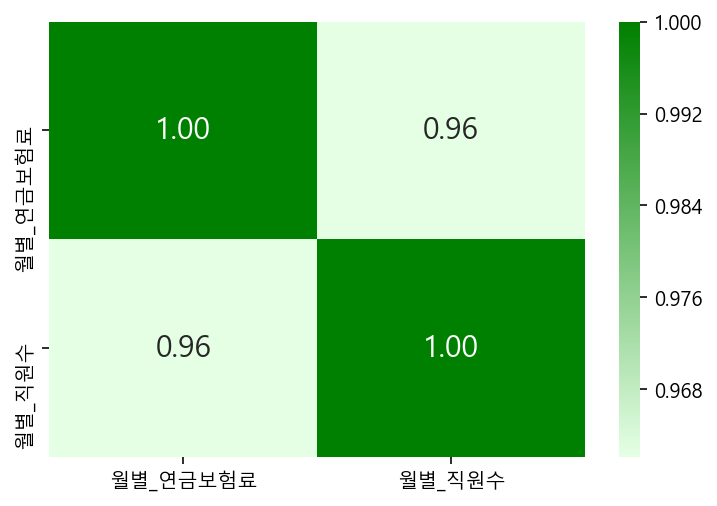

In [175]:
cm = sns.light_palette('green', as_cmap=True) 
sns.heatmap(data=df[['월별_연금보험료', '월별_직원수']].corr(),
           annot=True,
           fmt='.2f',
           annot_kws={'size':15},
           cmap=cm)

* 월별 연금보험료와 월별 직원수 간에는 매우 강한 양의 상관관계 --> 당연한 결과

In [180]:
# 년도, 월 순서대로 정렬 --> data
data = df.sort_values(by=['년도', '월'], ascending=True).copy()
print(data.shape)
data.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
3,386420,4815584,2015,11,3795900,14
93,145900,4753036,2015,11,4153140,25
97,139359,50216484,2015,11,10547240,39
193,135634,13168146,2015,11,10895560,44
327,190720,3680361,2015,11,945900,4


## 증감률

### 회사별 연매출액 증감률
#### 2018년 대비 2019년 증감률

In [188]:
data.loc[data['회사ID'] == 414].tail()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
17864,414,19732769,2018,8,81070500,248
18836,414,19732769,2018,9,80722840,248
84753,414,19732769,2018,10,80146840,248
30976,414,19732769,2018,11,81066640,251
24734,414,19732769,2018,12,79522000,246


In [198]:
data1 = data.set_index('회사ID')
data1.sort_index(inplace=True)
data1['Date'] = pd.to_datetime(data1['년도'].astype(str) + data1['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
data1.head()

,연매출액,년도,월,월별_연금보험료,월별_직원수,Date
회사ID,,,,,,
63,11328779396,2018,1,403119840,1006,2018/01
63,11328779396,2018,7,418169080,1009,2018/07
63,11328779396,2018,2,406770960,1018,2018/02
63,11328779396,2018,3,404826240,1013,2018/03
63,11328779396,2018,8,418292620,1011,2018/08


In [213]:
data_year = pd.pivot_table(data=data1,
              index='회사ID',
              columns='년도',
               values='연매출액')
data_year_18_19 = data_year[[2018, 2019]]
data_year_18_19.head()

년도,2018,2019
회사ID,,
63,11328779396.00,NaN
95,656947437.00,NaN
102,742658938.00,NaN
295,83776697.00,NaN
414,19732769.00,NaN


**결측치 처리, How?**

In [221]:
data_year_18_19.T.fillna(method='pad')
data_year_18_19.T.fillna(method='bfill')

회사ID,63,95,102,295,414,597,786,917,1052,1125,...,1065828,1949405,1983879,2256869,2329349,2400284,2437574,2693684,3312354,5159723
년도,,,,,,,,,,,,,,,,,,,,,
2018,11328779396.00,656947437.00,742658938.00,83776697.00,19732769.00,208141595.00,65514573.00,42843708.00,1215784.00,53713870.00,...,8108413.00,1033800.00,632516.00,275162.00,1314405.00,1263406.00,214016.00,238076.00,1451563.00,2591898.00
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238076.00,1451563.00,2591898.00
rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
# 2019년 연매출 데이터 있는 경우
len(data_year_18_19[2019].loc[data_year_18_19[2019].notnull()])

74

**결측치는 일단 drop하기로**

In [237]:
data_year_18_19.dropna(inplace=True)
data_year_18_19['rate'] = ((data_year_18_19[2019] - data_year_18_19[2018]) / data_year_18_19[2018]) * 100
data_year_18_19

년도,2018,2019,rate
회사ID,,,
14271,8388401.00,9039340.00,7.76
128174,84777341.00,105847542.00,24.85
130261,15452289.00,15498542.00,0.30
130756,16664338.00,3600374.00,-78.39
131998,29757853.00,28298862.00,-4.90
134575,16110817.00,16492369.00,2.37
135668,23521557.00,20471120.00,-12.97
138077,25711081.00,29041712.00,12.95
139442,11386373.00,25645141.00,125.23


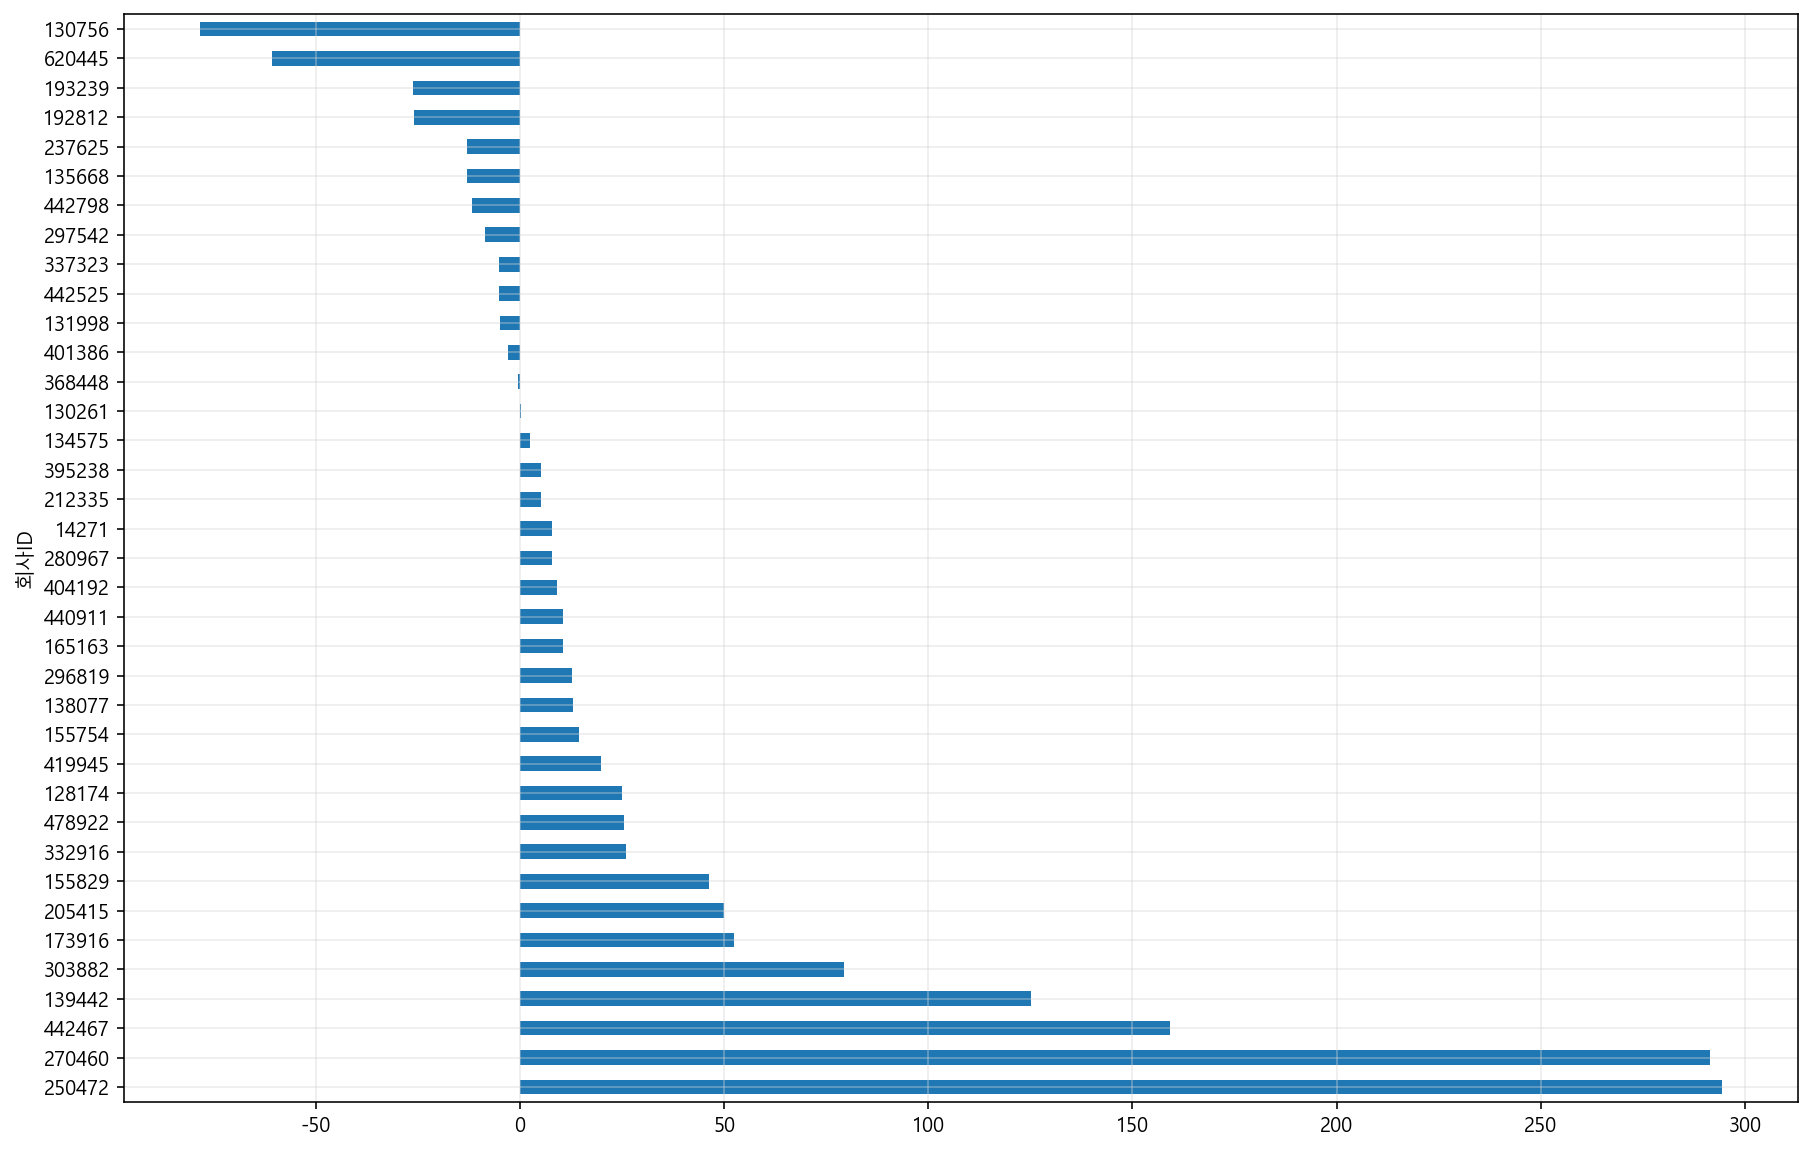

In [243]:
ax = data_year_18_19['rate'].T.sort_values(ascending=False).plot(kind='barh', figsize=(15, 10), legend=False)
# ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.45)

#### 2018년 대비 2019년 연매출 성장률 50% 이상인 기업

In [249]:
print(len(data_year_18_19.loc[data_year_18_19['rate'] >= 50]))
data_year_18_19.loc[data_year_18_19['rate'] >= 50].sort_values(by='rate', ascending=False)

6


년도,2018,2019,rate
회사ID,,,
250472,3226813.00,12724602.00,294.34
270460,1960000.00,7670000.00,291.33
442467,17003119.00,44059030.00,159.12
139442,11386373.00,25645141.00,125.23
303882,11025903.00,19778625.00,79.38
173916,2495778.00,3801046.00,52.30


* 250472, 270460, 442467, 139442, 303882, 173916 : **18년 대비 19년 연매출 50%이상 상승**

# 1차 EDA 결론
### (1) 연매출 외에도 월 연금보험료와 월 직원수 컬럼의 증감률을 확인하고
### (2) 자체적으로 기준을 설정한 다음, 그 기준에 맞는 기업들을 확인해봐야함
### (3) 또한, 절대적 수치에 의존해서는 안되지만 연매출이 마이너스이거나 직원수가 한 자리수이거나 월 연금보험료가 0원인, 유니콘 기업으로서의 가능성이 없는 기업들은 1차적으로 소거하고 분석을 진행하는 것이 좋을 것으로 보임
### (4) 18년 대비 19년 연매출 50%이상 상승한 기업은 총 6곳.
#### 왜 연매출 50%이상 성장한 기업을 본 것인가? 
#### --> 유니콘 기업들, 예비 유니콘 기업들이라 불리는 기업들의 19년 대비 20년 매출 상승률은 '대부분' 50% 이상을 보였음
<br> (참고자료: https://brunch.co.kr/@digitalnative/23)
### 변수들을 조합하여 새로운 피처 생성할 필요 있음

FinanceDataReader 라이브러리 데이터와의 match

매치되는 종목코드 없음

In [95]:
# ! pip install finance-datareader

In [96]:
# import FinanceDataReader as fdr

In [97]:
# krx = fdr.StockListing('KRX')
# print(krx.shape)
# krx.head()

In [98]:
# df.head(20)

In [99]:
# krx.loc[krx['Symbol'].str.contains('366033|000040')]